# Phase 1 Project

## Final Project Submission

* Student name: Stacy Waweru
* Student pace: full time
* Scheduled project review date/time: 15/06/24 00:00
* Instructor name: Antonny Muiko
* Blog post URL: n/a

## Overview
The company is expanding in to new industries to diversify its portfolio. Specifically, in purchasing and operating airplanes for commercial and private enterprises. However, since it is a new industries, we do not know anything about the potential risks of aircraft. I will need to determining which aircraft are the lowest risk for the company to start this new business endeavor.



## The Data
In the data folder is a dataset from the National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters.

### Data Analysis
To make a well informed decision, thorough data analysis will be required to take place. Some of the data collected will be necessary to make inferences to determine the aircraft which poses the lowest risk to the company. Some data will also be dropped since it will not be relevant in this instance. Data may also be added based on the collected data.

#### Data Importation and loading

In [167]:
#Libraries that will be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [168]:
#To load the csv file
file_path = r"C:\Users\stacy\Documents\Flatiron\Project\Phase-1-Project\AviationData.csv"

#Avoid encoding errors and ensure that panda reads the entire csv file in one go
df = pd.read_csv(file_path, encoding='latin1',low_memory=False) 

In [169]:
#To view the first 5 rows
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [170]:
#Displaythe last 5 rows
df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [171]:
#Display the number of rows and columns
df.shape

(88889, 31)

In [172]:
#Summary statistics for numerical columns in our DataFrame
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


### Data Cleaning

In [173]:
#To get a summary of the data in the csv file
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [174]:
#Determine the number of missing values
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

In [175]:
#Drop columns that will not be necessary for the data anlaysis
columns_to_drop =['Investigation.Type','Accident.Number','Latitude','Longitude','Airport.Code','Airport.Name','Registration.Number','FAR.Description','Air.carrier','Schedule','Publication.Date',]

df= df.drop(columns= columns_to_drop)

In [176]:
#Determine the number of rows and columns
df.shape

(88889, 20)

In [177]:
df.head()

,Event.Id,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status
0,20001218X45444,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NaN,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause
1,20001218X45447,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,NaN,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause
2,20061025X01555,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,NaN,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause
3,20001218X45448,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,NaN,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause
4,20041105X01764,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,NaN,Cessna,501,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause


In [178]:
#Determine the number of missing values in each column
df.isna().sum()

Event.Id                      0
Event.Date                    0
Location                     52
Country                     226
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
Purpose.of.flight          6192
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
dtype: int64

In [179]:
# Use mode to remove missing values in categorical data
categorical_col = ['Location','Country','Injury.Severity','Aircraft.damage','Aircraft.Category','Registration.Number','Model','Make','Amateur.Built','Engine.Type','Purpose.of.flight','Weather.Condition','Broad.phase.of.flight','Report.Status']

for col in categorical_col:
    if col in df.columns:
        mode_value = df[col].mode()[0]
        df[col].fillna(mode_value, inplace=True)

In [180]:
df.isna().sum()

Event.Id                      0
Event.Date                    0
Location                      0
Country                       0
Injury.Severity               0
Aircraft.damage               0
Aircraft.Category             0
Make                          0
Model                         0
Amateur.Built                 0
Number.of.Engines          6084
Engine.Type                   0
Purpose.of.flight             0
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition             0
Broad.phase.of.flight         0
Report.Status                 0
dtype: int64

In [181]:
# Use median to remove missing values in numerical data
df['Number.of.Engines'].fillna(df['Number.of.Engines'].median(), inplace = True)
df['Total.Fatal.Injuries'].fillna(df['Total.Fatal.Injuries'].median(), inplace = True)
df['Total.Serious.Injuries'].fillna(df['Total.Serious.Injuries'].median(), inplace = True)
df['Total.Minor.Injuries'].fillna(df['Total.Minor.Injuries'].median(), inplace = True)
df['Total.Uninjured'].fillna(df['Total.Uninjured'].median(), inplace = True)

In [182]:
#Confirm that therer is no missing value
df.isna().sum()

Event.Id                  0
Event.Date                0
Location                  0
Country                   0
Injury.Severity           0
Aircraft.damage           0
Aircraft.Category         0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Report.Status             0
dtype: int64

In [183]:
#Confirm the number of rows and colums after the data has been cleaned
df.shape

(88889, 20)

In [184]:
df.head()

,Event.Id,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status
0,20001218X45444,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Airplane,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause
1,20001218X45447,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,Airplane,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause
2,20061025X01555,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Airplane,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,0.0,0.0,1.0,IMC,Cruise,Probable Cause
3,20001218X45448,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,Airplane,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause
4,20041105X01764,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,Airplane,Cessna,501,No,1.0,Reciprocating,Personal,1.0,2.0,0.0,0.0,VMC,Approach,Probable Cause


##### Adding a year column
This is to show the number of accidents that have occured in the course of the years progressively. This may be due to various factors.

In [185]:
#Number of accidents per year

df.loc[:, 'Date'] = pd.to_datetime(df['Event.Date'])
df.loc[:, 'Year'] = df['Date'].dt.year
accidents_per_year = df['Year'].value_counts().sort_index()
accidents_per_year

1948       1
1962       1
1974       1
1977       1
1979       2
1981       1
1982    3593
1983    3556
1984    3457
1985    3096
1986    2880
1987    2828
1988    2730
1989    2544
1990    2518
1991    2462
1992    2355
1993    2313
1994    2257
1995    2309
1996    2187
1997    2148
1998    2226
1999    2209
2000    2220
2001    2063
2002    2020
2003    2085
2004    1952
2005    2031
2006    1851
2007    2016
2008    1893
2009    1783
2010    1786
2011    1850
2012    1835
2013    1561
2014    1535
2015    1582
2016    1664
2017    1638
2018    1681
2019    1624
2020    1392
2021    1545
2022    1607
Name: Year, dtype: int64

In [186]:
df

,Event.Id,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,...,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Date,Year
0,20001218X45444,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Airplane,Stinson,108-3,No,...,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,1948-10-24,1948
1,20001218X45447,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,Airplane,Piper,PA24-180,No,...,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,1962-07-19,1962
2,20061025X01555,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Airplane,Cessna,172M,No,...,Personal,3.0,0.0,0.0,1.0,IMC,Cruise,Probable Cause,1974-08-30,1974
3,20001218X45448,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,Airplane,Rockwell,112,No,...,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,1977-06-19,1977
4,20041105X01764,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,Airplane,Cessna,501,No,...,Personal,1.0,2.0,0.0,0.0,VMC,Approach,Probable Cause,1979-08-02,1979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,2022-12-26,"Annapolis, MD",United States,Minor,Substantial,Airplane,PIPER,PA-28-151,No,...,Personal,0.0,1.0,0.0,0.0,VMC,Landing,Probable Cause,2022-12-26,2022
88885,20221227106494,2022-12-26,"Hampton, NH",United States,Non-Fatal,Substantial,Airplane,BELLANCA,7ECA,No,...,Personal,0.0,0.0,0.0,0.0,VMC,Landing,Probable Cause,2022-12-26,2022
88886,20221227106497,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,Airplane,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,...,Personal,0.0,0.0,0.0,1.0,VMC,Landing,Probable Cause,2022-12-26,2022
88887,20221227106498,2022-12-26,"Morgan, UT",United States,Non-Fatal,Substantial,Airplane,CESSNA,210N,No,...,Personal,0.0,0.0,0.0,0.0,VMC,Landing,Probable Cause,2022-12-26,2022


### Data Analysis

#### Data Visualization
We will need to visualize the cleaned data. Using various colums that are correlated, we will be able to analyse the data.

In [187]:
num_unique_makes = df['Make'].nunique()

print(f"The number of unique makes is: {num_unique_makes}")

The number of unique makes is: 8237


##### Aircraft model involved in the most accidents

Cessna is the same as CESSNA. We will need to remove the duplicates.

In [188]:
#dealing with duplicates in categories.
df['Make'] = df['Make'].str.title()

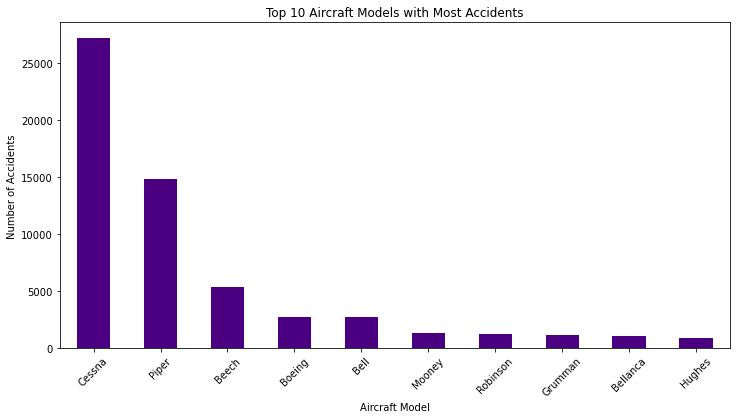

In [189]:
# Grouping by Model and Number of accidents
accidents_by_model = df['Make'].value_counts()

# Selecting the top 10 models with the most accidents
top_10_model = accidents_by_model.head(10)

# Plotting
plt.figure(figsize=(12, 6))
top_10_models.plot(kind='bar', color='indigo', width=0.5)
plt.title('Top 10 Aircraft Models with Most Accidents')
plt.xlabel('Aircraft Model')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

Cessna appears to be involved in the most number of accidents

###### Model of Cessna involved in the most accidents 

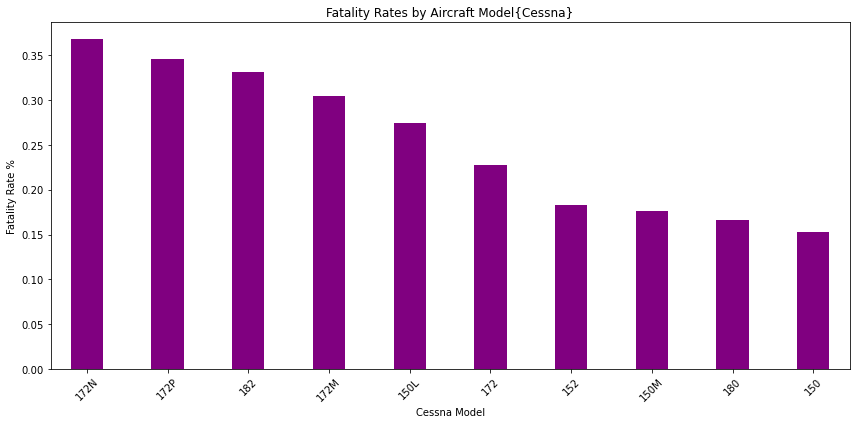

In [190]:
#Fatality Rates by different Cessna models

# Filter data for 'Cessna' models
cessna_data = df[df['Make'] == 'Cessna']

# Calculate the number of accidents for each Cessna model
accidents_by_model = cessna_data['Model'].value_counts().head(10)

# Calculate the total number of fatal injuries for each Cessna model
fatalities_by_model = cessna_data.groupby('Model')['Total.Fatal.Injuries'].sum()

# Calculate the fatality rate (total fatal injuries / number of accidents)
fatality_rate = (fatalities_by_model / accidents_by_model).dropna().sort_values(ascending=False)

# Plot the fatality rates for Cessna models
plt.figure(figsize=(12, 6))
plt.title('Fatality Rates by Aircraft Model{Cessna}')
fatality_rate.plot(kind='bar', color='purple', width= 0.4)
plt.xlabel('Cessna Model')
plt.ylabel('Fatality Rate %')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()

Cessna 172N has the most fatalities while Cessna 150 has the least fatalities

##### Phase of flight where most accidents happen

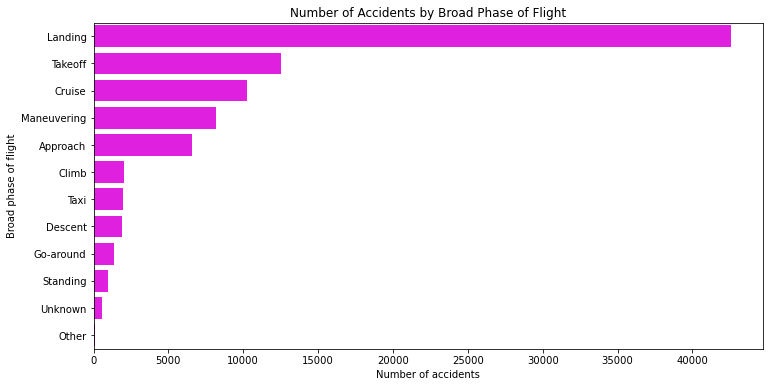

In [193]:
#Phase of flight where most accidents happen

plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Broad.phase.of.flight', order=df['Broad.phase.of.flight'].value_counts().index, color='magenta') 
plt.title('Number of Accidents by Broad Phase of Flight')
plt.xlabel('Number of accidents')
plt.ylabel('Broad phase of flight')
plt.show()

Most accidents appear to happen during the landing phase.

##### Weather condition where most accidents happen

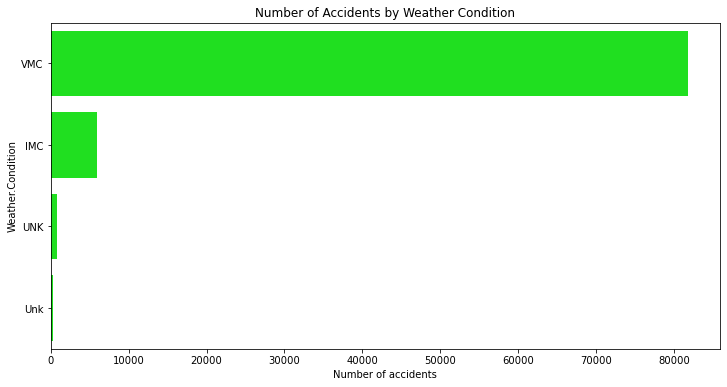

In [194]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Weather.Condition', order=df['Weather.Condition'].value_counts().index, color='lime') 
plt.title('Number of Accidents by Weather Condition')
plt.ylabel('Weather.Condition')
plt.xlabel('Number of accidents')
plt.show()

In [ ]:
The VMC weather condition has the most accidents

## Data exportation
This data will be exported as a new csv file. It will be used in the next step of the analysis in Tableau as the cleaned data.

In [195]:
#covert back to csv 
df.to_csv("Aviation_cleaned.csv",index=False)